ticks 128037 = 244.8113748423346 x 523.0026590163934
freqs [523.26] Hz, length 1.2766198282591725 s
first/last val 0.0 4.1195773519575596e-05

ticks 128037 = 244.8113748423346 x 523.0026590163934
freqs [523.26, 104.652] Hz, length 1.0069164715066354 s
first/last val 0.0 4.994866321794689e-05

ticks 128037 = 244.8113748423346 x 523.0026590163934
freqs [523.26, 104.652, 87.21] Hz, length 1.1753317720530836 s
first/last val 0.0 3.953235864173621e-05

ticks 128037 = 244.8113748423346 x 523.0026590163934
freqs [523.26, 104.652, 87.21, 65.4075] Hz, length 1.0035909445745512 s
first/last val 0.0 -6.562264024978504e-05

ticks 128037 = 244.8113748423346 x 523.0026590163934
freqs [523.26, 104.652, 87.21, 65.4075, 58.14] Hz, length 1.08 s
first/last val 0.0 -4.948920468450524e-05

ticks 128037 = 244.8113748423346 x 523.0026590163934
freqs [523.26, 104.652, 87.21, 65.4075, 58.14, 52.326] Hz, length 1.01256049960968 s
first/last val 0.0 -7.244163134600967e-05

ticks 128037 = 244.8113748423346 x 523

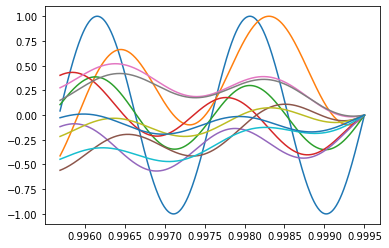

ticks 127792 = 489.6227496846692 x 261.0009442622951
freqs [261.63] Hz, length 1.0740437158469944 s
first/last val 0.0 9.417345427209511e-05

ticks 127808 = 436.20428006642 x 293.00033456925024
freqs [293.66974569918125] Hz, length 1.1169086651053863 s
first/last val 0.0 -5.562735168496147e-05

ticks 127854 = 388.6138339585031 x 329.00012513103815
freqs [329.6331442839957] Hz, length 1.0526932084309133 s
first/last val 0.0 -6.202805707289372e-06

ticks 128015 = 366.8026154261799 x 349.00241878390693
freqs [349.2341510465061] Hz, length 1.3200390320062452 s
first/last val 0.0 -9.78394309640862e-05

ticks 128100 = 326.78397989370757 x 392.00208052324615
freqs [392.00208052324615] Hz, length 1.051022638563622 s
first/last val 0.0 5.4558227020606864e-06

ticks 128098 = 291.13142879610245 x 440.0005884961154
freqs [440.00745824565865] Hz, length 1.1931693989071037 s
first/last val 0.0 -2.548862767071114e-06

ticks 127869 = 259.36861672481314 x 493.0010485257259
freqs [493.8916728538229] Hz,

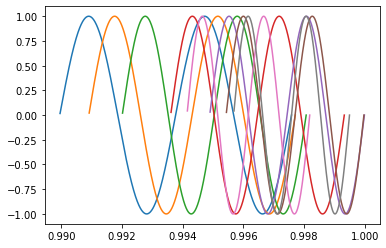

In [75]:
import harmonic_3
import matplotlib.pyplot as plt
import numpy as np
import pyaudio
import time
from math import sin, pi, ceil

def generate(f, ticks):
    v = 0
    def w(t):
        return np.float32(np.mean([sin(ff*2*pi*t) for ff in f]))
    for t in ticks:
        newv = w(t)
        dv = newv - v
        v = newv
        yield v
    while not np.isclose(v, 0, atol=0.0001) or dv < 0:
        t += 1/rate 
        newv = w(t)
        dv = newv - v
        v = newv
        yield v


def play(x, T, func):
    f = [key/p for p in x]
    tpp = rate/f[0]
    l = rate*T
    l = l - (l % tpp)
    ticks = [t/rate for t in range(ceil(l))]
    print('ticks {} = {} x {}'.format(len(ticks), tpp, len(ticks)/tpp))
    samples = np.array(list(generate(f,ticks)))
    plt.plot(ticks[-int(2*tpp):], samples[-int(2*tpp):])
    print('freqs {} Hz, length {} s'.format(f,len(samples)/rate))
    print('first/last val {} {}\n'.format(samples[0],samples[-1]))
    stream.write(samples.tobytes())


# key = 261.63  # Hz
key = 523.26 # Hz
rate = 128100
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paFloat32, channels=1, rate=rate, output=True, frames_per_buffer=2048)

notes = harmonic_3.dpfind((),2,11)
chords = [notes[:n] for n in range(1,len(notes)+1)]
for chord in chords:
    play(chord, 1.0, np.mean)

plt.show()

chords = [(2**(z*1.0/12),) for z in range(0,13)]
chords.reverse()

for chord in [chords[i-1] for i in (1,3,5,6,8,10,12,13)]:
    play(chord, 1.0, np.mean)

stream.stop_stream()
stream.close()
p.terminate()

In [ ]:
print(ticks)

In [ ]:
print(samples[:100])